In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mylibrary.nnlib as nn

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5

In [3]:
xy  = np.c_[x,y]

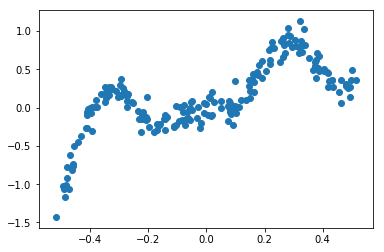

In [4]:
plt.scatter(x, y)

In [29]:
# Architecture defination
aeoptim = nn.Adam(0.01)
layer1 = nn.LinearLayer(2, 1, optimizer=aeoptim)
layer2 = nn.LinearLayer(1, 2, optimizer=aeoptim)

In [30]:
def ae_forward(x):
    a1 = layer1.forward(x)
    a2 = layer2.forward(a1)
    return a1, a2

def ae_backward(dy):
    da1 = layer2.backward(dy)
    dx = layer1.backward(da1)
    return da1, dx

def ae_update():
    layer1.update()
    layer2.update()

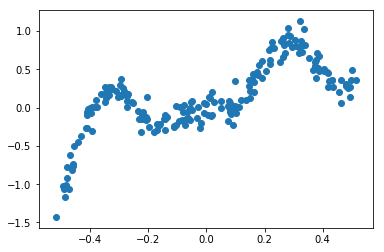

In [31]:
plt.scatter(xy[:,0], xy[:,1])

In [32]:
a1, a2 = ae_forward(xy)

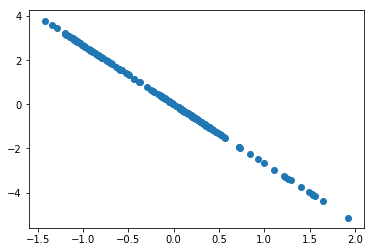

In [33]:
# the a2 can aligned in negative slope as compared to xy
plt.scatter(a2[:,0], a2[:,1])

In [34]:
# for step in range(10000):
#     a1, a2 = ae_forward(xy)
    
#     loss = nn.MseLoss.loss(a2, xy)
#     dy = nn.MseLoss.del_loss(a2, xy)
    
#     da1, dx = ae_backward(dy)
    
#     ae_update()
    
#     if step % 100 == 0:

#         print('_______________________')
#         print("epoch", step)
#         print("Loss", loss)

#         print("\n")
#         if loss < 0.0025:
#             print('fitted to our expectation')
#             break

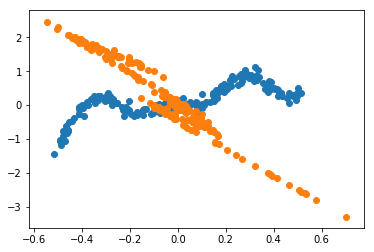

In [39]:
xy1 = (xy + a2)/2.
plt.scatter(xy[:,0], xy[:,1])
plt.scatter(xy1[:,0], xy1[:,1])

In [36]:
a11, a21 = ae_forward(xy1)

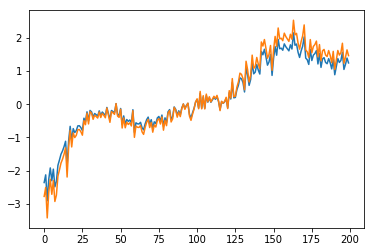

In [38]:
plt.plot(a1)
plt.plot(a11)

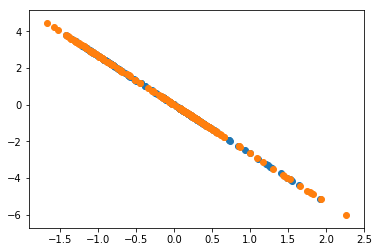

In [40]:
plt.scatter(a2[:,0], a2[:,1])
plt.scatter(a21[:,0], a21[:,1])

In [ ]:
# the input_data parameter of the network has changed so, it will not work for recirculation